# Analyse exploratoire

## Import des outils / jeu de données

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.utils import init_notebook

In [ ]:
init_notebook()

In [ ]:
df = pd.read_csv(
    "data/kickstarter_1.csv",
    parse_dates=True,
)

## Présentation

### Problématique

Dans une première **analyse univariée**, nous chercherons à **modéliser la fonction de survie du financement d'un projet Kickstarter**, c'est-à-dire la probabilité que le projet n'ait pas encore été financé, en fonction de sa durée de vie, en jours.

Dans une deuxième **analyse multivariée**, nous déterminerons **comment les différents paramètres des projets Kickstarter influencent-ils la durée nécessaire pour atteindre leur objectif** de financement ou leur échec dans le temps imparti ?  

### Jeu de données

Le jeu de données contient une liste de 18 143 projets Kickstarter menés entre le 15 décembre 2013 et le 15 juin 2014.  

Il est important de préciser que le jeu de données a été mis à l'échelle (*scaling*), d'où des valeurs décimales pour des variables entières.    

Pour chaque projet, nous disposons notamment de :
- quand son objectif a été atteint: `day_succ`
- si l'objectif a été atteint: `status`
- l'objectif financier: `goal`
- le nombre de financeurs: `backers`
- la catégorie du projet (art, cuisine, technologie, ...): `cat`
- si le projet est promu par une vidéo: `has_videos`
- si le projet a un compte facebook: `facebook_connected`
- le nombre de *followers* du projet: `facebook_friends` 
- etc.

#### Lecture des données

#### Présentation des variables

In [ ]:
print(
    f"Il y a {df.shape[1]} variables "
    f"qui décrivent {df.shape[0]} projets kickstarter."
)

Il y a 56 variables qui décrivent 4175 projets kickstarter.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4175 entries, 0 to 4174
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   day_succ                    4175 non-null   int64  
 1   Status                      4175 non-null   int64  
 2   cat1                        4175 non-null   int64  
 3   cat2                        4175 non-null   int64  
 4   cat3                        4175 non-null   int64  
 5   cat4                        4175 non-null   int64  
 6   cat5                        4175 non-null   int64  
 7   cat6                        4175 non-null   int64  
 8   cat7                        4175 non-null   int64  
 9   cat8                        4175 non-null   int64  
 10  cat9                        4175 non-null   int64  
 11  cat10                       4175 non-null   int64  
 12  cat11                       4175 non-null   int64  
 13  cat12                       4175 

Nous séparons les variables numériques des variables catégoriques pour plus de commodités.

In [ ]:
var_categoriques = (
    [f"cat{i}" for i in range(1, 16)]
    + [f"curr{i}" for i in range(1, 7)]
    + ["Status", "facebook_connected", "has_video"]
)
var_categoriques

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'curr1',
 'curr2',
 'curr3',
 'curr4',
 'curr5',
 'curr6',
 'Status',
 'facebook_connected',
 'has_video']

In [ ]:
var_numeriques = df.columns

Nous convertissons les variables catégoriques en type `category`. (Nous les convertissons au préalable en type `string` car cela facilite l'affichage de la légende avec Matplotlib et Seaborn)

In [ ]:
df[var_categoriques] = df[var_categoriques].astype(str).astype("category")

Nous convertissons les variables au format date.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4175 entries, 0 to 4174
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   day_succ                    4175 non-null   int64   
 1   Status                      4175 non-null   category
 2   cat1                        4175 non-null   category
 3   cat2                        4175 non-null   category
 4   cat3                        4175 non-null   category
 5   cat4                        4175 non-null   category
 6   cat5                        4175 non-null   category
 7   cat6                        4175 non-null   category
 8   cat7                        4175 non-null   category
 9   cat8                        4175 non-null   category
 10  cat9                        4175 non-null   category
 11  cat10                       4175 non-null   category
 12  cat11                       4175 non-null   category
 13  cat12             

Nous avons 11 variables catégoriques, 16 variables quantitatives (dont 15 entières) ainsi qu'une variable de type date.

## Visualisations

<Axes: xlabel='day_succ', ylabel='Count'>

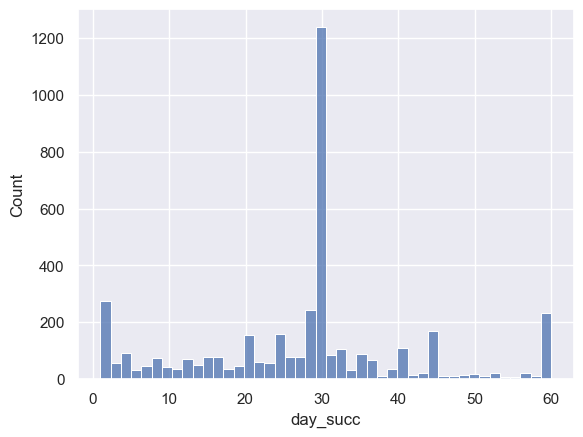

In [ ]:
sns.histplot(df["day_succ"])

Text(0.5, 0, 'Statut des projets')

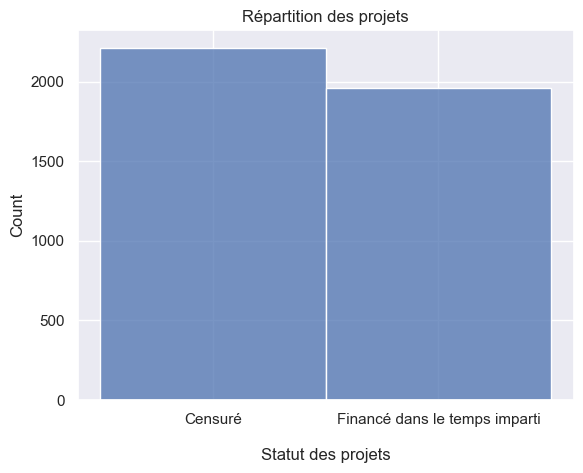

In [ ]:
plt.title("Répartition des projets")

sns.histplot(df["Status"])

plt.xticks([0, 1], ["Censuré", "Financé dans le temps imparti"])
plt.xlabel("Statut des projets", labelpad=15)  # labelpad add vertical space